Saving closed eye.jpg to closed eye.jpg


Saving Face-Mask-PNG-Free-Image.webp to Face-Mask-PNG-Free-Image.webp
Face covered or masked in Face-Mask-PNG-Free-Image.webp!


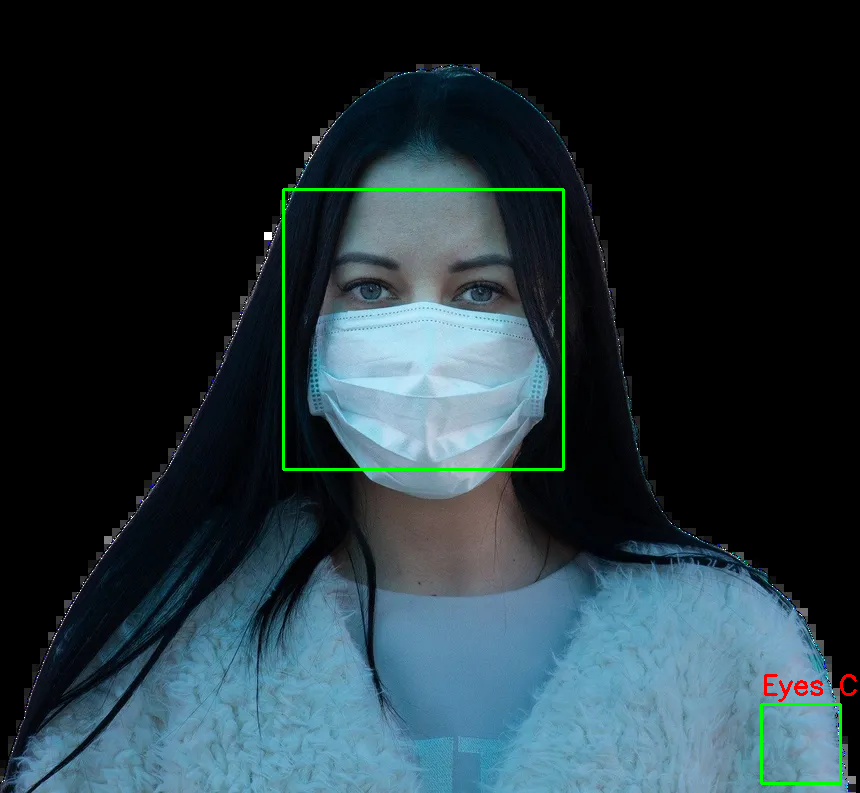

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Upload the Haar Cascade XML files
from google.colab import files
uploaded = files.upload()  # Upload 'haarcascade_frontalface_default.xml' and 'haarcascade_eye.xml'

# Load the Haar Cascades
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Upload the photo(s) for detection
uploaded_images = files.upload()  # Upload one or more photos

# Function to detect closed eyes (based on absence of eyes detected)
def detect_closed_eyes(eyes):
    if len(eyes) == 0:
        return True  # Eyes are closed or not detected
    return False  # Eyes are open

# Function to detect if the face is likely covered (based on the absence of eyes)
def detect_covered_face(faces, eyes):
    if len(faces) > 0 and len(eyes) == 0:
        return True  # No eyes detected, assume face is covered (e.g., mask)
    return False

# Process each uploaded image
for image_name in uploaded_images.keys():
    # Read the image
    image = cv2.imread(image_name)
    if image is None:
        print(f"Error: Could not read {image_name}.")
        continue

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=5,
        minSize=(30, 30)
    )

    # Track the number of faces detected
    face_count = len(faces)
    face_covered = False

    # Draw rectangles around detected faces and check for eyes
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw face rectangle

        # Detect eyes within the detected face region
        roi_gray = gray[y:y + h, x:x + w]  # Region of interest for eyes
        eyes = eyeCascade.detectMultiScale(roi_gray)

        # Check if eyes are closed
        if detect_closed_eyes(eyes):
            cv2.putText(image, 'Eyes Closed', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

        # Check if the face is likely covered (no eyes detected)
        if detect_covered_face(faces, eyes):
            face_covered = True

    # Display the result
    if face_covered:
        print(f"Face covered or masked in {image_name}!")
    else:
        print(f"Found {face_count} face(s) in {image_name}.")

    cv2_imshow(image)  # Show the processed image
